In [5]:
# !conda install scikit-learn -y

In [11]:
# !pip install Pillow

In [2]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
path = './animals/'
categories = ['dogs', 'panda', 'cats']
    

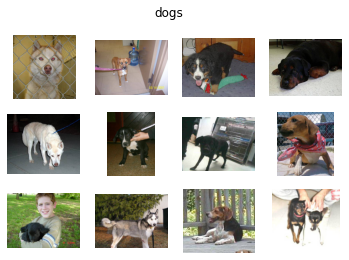

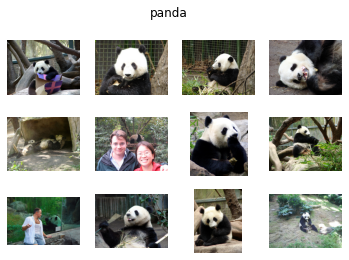

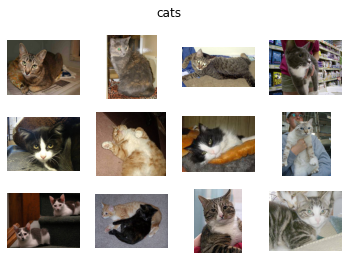

In [3]:


for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [4]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []


dogs  => height min :  50 width min :  59
dogs  => height max :  500 width max :  500
panda  => height min :  87 width min :  78
panda  => height max :  1200 width max :  1600
cats  => height min :  32 width min :  55
cats  => height max :  500 width max :  500


 let's resize pictures to height = 32 and width = 55.

In [5]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)



[['./animals/cats/cats_00581.jpg', 2], ['./animals/dogs/dogs_00709.jpg', 0], ['./animals/dogs/dogs_00270.jpg', 0], ['./animals/dogs/dogs_00189.jpg', 0], ['./animals/dogs/dogs_00424.jpg', 0], ['./animals/dogs/dogs_00232.jpg', 0], ['./animals/dogs/dogs_00245.jpg', 0], ['./animals/dogs/dogs_00480.jpg', 0], ['./animals/cats/cats_00678.jpg', 2], ['./animals/dogs/dogs_00132.jpg', 0]]


In [6]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

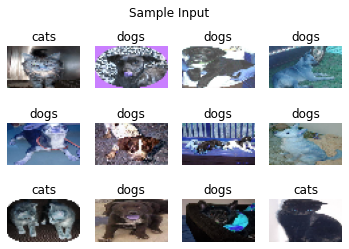

In [7]:
# Let's check everything is ok
fig, _ = plt.subplots(3,4)
fig.suptitle("Sample Input")
fig.patch.set_facecolor('xkcd:white')
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

Split dataset into train and test set

In [8]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
# Preprocess class labels
trainY = np_utils.to_categorical(trainY, 3)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2400, 32, 55, 3)
(600, 32, 55, 3)
(2400, 3)
(600,)


In [10]:
model = Sequential()

model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 54, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 27, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 26, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 13, 32)         0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 13, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2912)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [11]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)
model.save("vyshak.h5")


Epoch 1/25
75/75 [==============================] - 15s 202ms/step - loss: 0.9070 - accuracy: 0.5275
Epoch 2/25
75/75 [==============================] - 14s 190ms/step - loss: 0.7436 - accuracy: 0.6304
Epoch 3/25
75/75 [==============================] - 14s 182ms/step - loss: 0.7000 - accuracy: 0.6496
Epoch 4/25
75/75 [==============================] - 13s 168ms/step - loss: 0.6673 - accuracy: 0.6700
Epoch 5/25
75/75 [==============================] - 12s 164ms/step - loss: 0.6218 - accuracy: 0.7100
Epoch 6/25
75/75 [==============================] - 17s 230ms/step - loss: 0.5957 - accuracy: 0.7225
Epoch 7/25
75/75 [==============================] - 19s 248ms/step - loss: 0.5738 - accuracy: 0.7154
Epoch 8/25
75/75 [==============================] - 17s 229ms/step - loss: 0.5536 - accuracy: 0.7433
Epoch 9/25
75/75 [==============================] - 17s 220ms/step - loss: 0.5342 - accuracy: 0.7500
Epoch 10/25
75/75 [==============================] - 15s 195ms/step - loss: 0.5113 - accura

In [12]:
from tensorflow import keras
model = keras.models.load_model('vyshak.h5')

In [14]:
# model.summary()

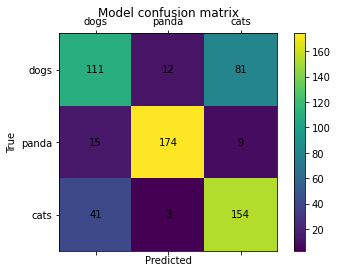

Accuracy : 73.17%


In [15]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

Prediction : panda


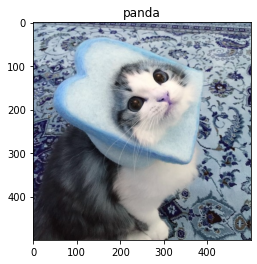

In [16]:
test_data=[]
test_image_o = cv2.imread('cat.jpg')
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # .flatten()
test_data.append(test_image)

# scale the raw pixel intensities to the range [0, 1]
test_data = np.array(test_image, dtype="float") / 255.0
test_data=test_data.reshape([-1,32, 55, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) # return to label
print ('Prediction : '+categories[predictions[0]])

#Imersing into the plot
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)

Prediction : panda


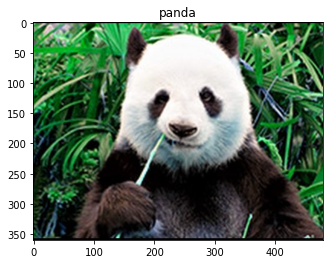

In [17]:
test_data=[]
test_image_o = cv2.imread('panda.jpg')
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # .flatten()
test_data.append(test_image)

# scale the raw pixel intensities to the range [0, 1]
test_data = np.array(test_image, dtype="float") / 255.0
test_data=test_data.reshape([-1,32, 55, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) # return to label
print ('Prediction : '+categories[predictions[0]])

#Imersing into the plot
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)

Prediction : cats


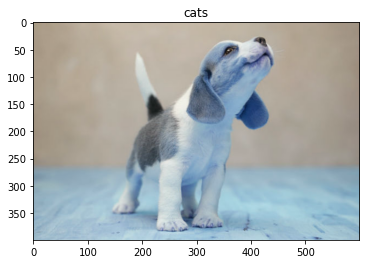

In [18]:
test_data=[]
test_image_o = cv2.imread('dog.jpg')
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # .flatten()
test_data.append(test_image)

# scale the raw pixel intensities to the range [0, 1]
test_data = np.array(test_image, dtype="float") / 255.0
test_data=test_data.reshape([-1,32, 55, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) # return to label
print ('Prediction : '+categories[predictions[0]])

#Imersing into the plot
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)

## Splitiing the imgss

(360, 480, 3)
(400, 400, 3)


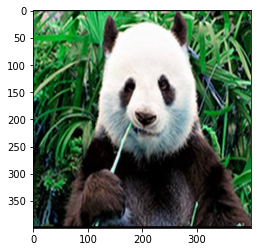

In [39]:
img = "panda.jpg"
img = cv2.imread(img)
print(img.shape)
img = cv2.resize(img, (400, 400)) 
print(img.shape)
plt.imshow(img)


# # scale the raw pixel intensities to the range [0, 1]
# img_data = np.array(img, dtype="float") / 255.0
# img_data=img_data.reshape([-1,32, 55, 3])
# pred = model.predict(img_data)
# predictions = argmax(pred, axis=1) # return to label
# print ('Prediction : '+categories[predictions[0]])

In [42]:
# !pip install image_slicer

In [45]:

# img = "panda.jpg"
# import image_slicer
# a = image_slicer.slice(img, 4)

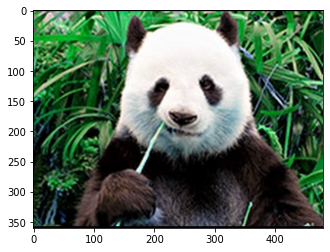

In [20]:
import cv2
import numpy as np
img = "panda.jpg"
image = cv2.imread(img)
plt.imshow(image)


In [40]:
import image_slicer
tiles = image_slicer.slice(img, 4,save=False)
image_slicer.save_tiles(tiles, directory='./temp',prefix='panda', format='png')

(<Tile #1 - panda_01_01.png>,
 <Tile #2 - panda_01_02.png>,
 <Tile #3 - panda_02_01.png>,
 <Tile #4 - panda_02_02.png>)

In [63]:
import os
files = os.listdir("temp")

In [64]:
files = ["/temp/"+i for i in files]

In [69]:
files_needed = []
for file in os.listdir():
    if file.startswith("panda_"):
        files_needed.append(os.path.join("", file))

In [70]:
files_needed

['panda_01_02.png', 'panda_02_01.png', 'panda_01_01.png', 'panda_02_02.png']

## fior one img

Prediction : panda


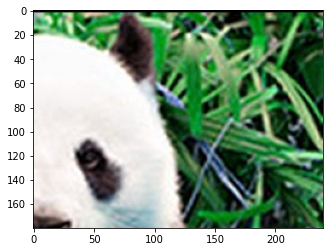

In [74]:
img = files_needed[0]
image = cv2.imread(img)
plt.imshow(image)
image.shape


test_data=[]
test_image_o = cv2.imread(img)
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # .flatten()
test_data.append(test_image)

# scale the raw pixel intensities to the range [0, 1]
test_data = np.array(test_image, dtype="float") / 255.0
test_data=test_data.reshape([-1,32, 55, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) # return to label
print ('Prediction : '+categories[predictions[0]])

##for alll img

Prediction : panda
Prediction : dogs
Prediction : panda
Prediction : cats


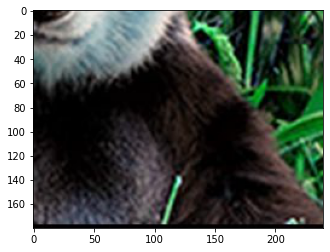

In [77]:
list_of_prediction = []
for img in files_needed:
    image = cv2.imread(img)
    plt.imshow(image)
    image.shape


    test_data=[]
    test_image_o = cv2.imread(img)
    test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # .flatten()
    test_data.append(test_image)

    # scale the raw pixel intensities to the range [0, 1]
    test_data = np.array(test_image, dtype="float") / 255.0
    test_data=test_data.reshape([-1,32, 55, 3])
    pred = model.predict(test_data)
    predictions = argmax(pred, axis=1) # return to label
    print ('Prediction : '+categories[predictions[0]])
    list_of_prediction.append(categories[predictions[0]])

In [78]:
list_of_prediction

['panda', 'dogs', 'panda', 'cats']

In [80]:
from collections import Counter
count = Counter(list_of_prediction)
print(count)

Counter({'panda': 2, 'dogs': 1, 'cats': 1})


In [81]:
max(count)

'panda'